In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
x_train = pd.read_csv(Path.cwd().parent / "data/german_credit_train.csv")
x_test = pd.read_csv(Path.cwd().parent / "data/german_credit_test.csv")

In [3]:
x_train.head()

CheckingStatus  LoanDuration           CreditHistory LoanPurpose  \
0       0_to_200            31    credits_paid_to_date       other   
1         less_0            18    credits_paid_to_date     car_new   
2         less_0            15  prior_payments_delayed   furniture   
3       0_to_200            28    credits_paid_to_date  retraining   
4    no_checking            28  prior_payments_delayed   education   

   LoanAmount ExistingSavings EmploymentDuration  InstallmentPercent     Sex  \
0        1889      100_to_500             less_1                   3  female   
1         462        less_100             1_to_4                   2  female   
2         250        less_100             1_to_4                   2    male   
3        3693        less_100          greater_7                   3    male   
4        6235     500_to_1000          greater_7                   3    male   

  OthersOnLoan  ...       OwnsProperty Age  InstallmentPlans Housing  \
0         none  ...  savings_insurance  32              none     own   
1         none  ...  savings_insurance  37            stores     own   
2         none  ...        real_estate  28              none     own   
3         none  ...  savings_insurance  32              none     own   
4         none  ...            unknown  57              none     own   

  ExistingCreditsCount      Job Dependents  Telephone ForeignWorker     Risk  
0                    1  skilled          1       none           yes  No Risk  
1                    2  skilled          1       none           yes  No Risk  
2                    2  skilled          1        yes            no  No Risk  
3                    1  skilled          1       none           yes  No Risk  
4                    2  skilled          1       none           yes     Risk  

[5 rows x 21 columns]

In [4]:
# Let's have a look at how much the class Risk is unbalanced or not

x_train['Risk'].value_counts()

Risk
No Risk    2669
Risk       1330
Name: count, dtype: int64

In [5]:
x_test.head()

Id CheckingStatus  LoanDuration           CreditHistory LoanPurpose  \
0   0    no_checking             9  prior_payments_delayed     car_new   
1   1         less_0             5   all_credits_paid_back     car_new   
2   2    no_checking            39  prior_payments_delayed     repairs   
3   3       0_to_200            15  prior_payments_delayed   furniture   
4   4       0_to_200            16  prior_payments_delayed     car_new   

   LoanAmount ExistingSavings EmploymentDuration  InstallmentPercent     Sex  \
0        1032      100_to_500             4_to_7                   3    male   
1        1523        less_100         unemployed                   2  female   
2        7150     500_to_1000             4_to_7                   3    male   
3         250     500_to_1000             4_to_7                   3    male   
4        5551      100_to_500             1_to_4                   3    male   

   ... CurrentResidenceDuration       OwnsProperty Age  InstallmentPlans  \
0  ...                        4  savings_insurance  41              none   
1  ...                        2        real_estate  19              none   
2  ...                        4            unknown  52              none   
3  ...                        2  savings_insurance  24              none   
4  ...                        3          car_other  34              none   

  Housing ExistingCreditsCount                       Job Dependents  \
0     own                    1  management_self-employed          1   
1    rent                    1  management_self-employed          1   
2     own                    2                   skilled          1   
3     own                    2                   skilled          2   
4    rent                    2  management_self-employed          1   

   Telephone ForeignWorker  
0       none           yes  
1       none           yes  
2        yes           yes  
3        yes           yes  
4       none           yes  

[5 rows x 21 columns]

In [6]:
x_test.drop(columns='Id')

CheckingStatus  LoanDuration           CreditHistory LoanPurpose  \
0       no_checking             9  prior_payments_delayed     car_new   
1            less_0             5   all_credits_paid_back     car_new   
2       no_checking            39  prior_payments_delayed     repairs   
3          0_to_200            15  prior_payments_delayed   furniture   
4          0_to_200            16  prior_payments_delayed     car_new   
...             ...           ...                     ...         ...   
996     no_checking            38    credits_paid_to_date  appliances   
997          less_0            31    credits_paid_to_date  retraining   
998          less_0            20  prior_payments_delayed    radio_tv   
999          less_0             4    credits_paid_to_date     car_new   
1000    no_checking            36  prior_payments_delayed       other   

      LoanAmount ExistingSavings EmploymentDuration  InstallmentPercent  \
0           1032      100_to_500             4_to_7                   3   
1           1523        less_100         unemployed                   2   
2           7150     500_to_1000             4_to_7                   3   
3            250     500_to_1000             4_to_7                   3   
4           5551      100_to_500             1_to_4                   3   
...          ...             ...                ...                 ...   
996         5308      100_to_500             4_to_7                   3   
997         1997        less_100             1_to_4                   3   
998         1155    greater_1000             1_to_4                   3   
999          250        less_100         unemployed                   1   
1000        8022      100_to_500             4_to_7                   5   

         Sex  OthersOnLoan  CurrentResidenceDuration       OwnsProperty  Age  \
0       male          none                         4  savings_insurance   41   
1     female          none                         2        real_estate   19   
2       male  co-applicant                         4            unknown   52   
3       male          none                         2  savings_insurance   24   
4       male          none                         3          car_other   34   
...      ...           ...                       ...                ...  ...   
996     male          none                         3  savings_insurance   31   
997     male          none                         3  savings_insurance   31   
998     male          none                         3  savings_insurance   33   
999   female          none                         1        real_estate   23   
1000    male          none                         3          car_other   53   

     InstallmentPlans Housing  ExistingCreditsCount                       Job  \
0                none     own                     1  management_self-employed   
1                none    rent                     1  management_self-employed   
2                none     own                     2                   skilled   
3                none     own                     2                   skilled   
4                none    rent                     2  management_self-employed   
...               ...     ...                   ...                       ...   
996              none     own                     1                   skilled   
997              none     own                     2                   skilled   
998              none    rent                     2                   skilled   
999              none    rent                     1                   skilled   
1000             none    free                     2  management_self-employed   

      Dependents Telephone ForeignWorker  
0              1      none           yes  
1              1      none           yes  
2              1       yes           yes  
3              2       yes           yes  
4              1      none           yes  
...          ...       ...         

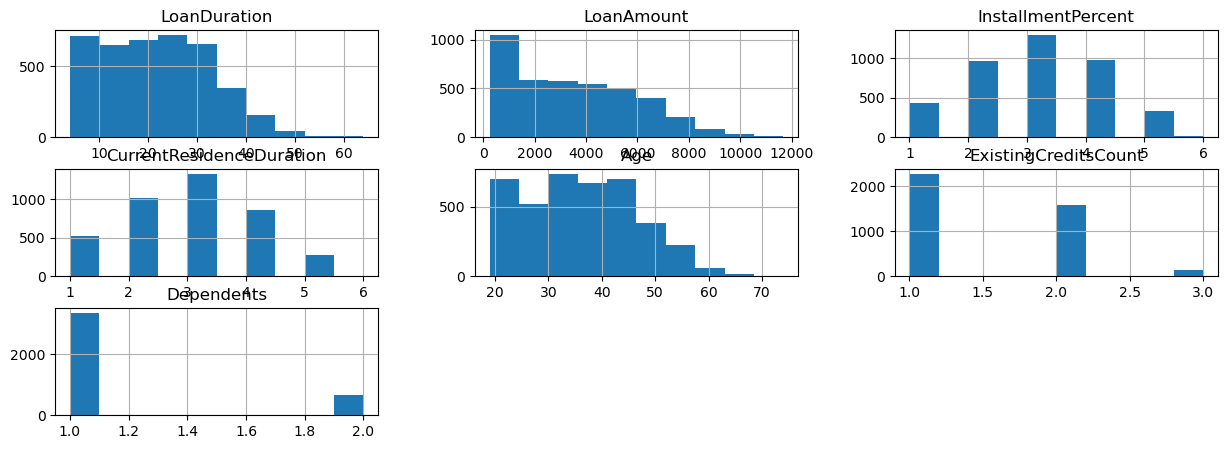

In [7]:
x_train.hist(figsize=(15, 5));

In [8]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [9]:
from ydata_profiling import ProfileReport

In [10]:
profile = ProfileReport(x_train, title = 'Profiling Report')

In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
x_train.nunique()

CheckingStatus                 4
LoanDuration                  57
CreditHistory                  5
LoanPurpose                   11
LoanAmount                  2794
ExistingSavings                5
EmploymentDuration             5
InstallmentPercent             6
Sex                            2
OthersOnLoan                   3
CurrentResidenceDuration       6
OwnsProperty                   4
Age                           52
InstallmentPlans               3
Housing                        3
ExistingCreditsCount           3
Job                            4
Dependents                     2
Telephone                      2
ForeignWorker                  2
Risk                           2
dtype: int64

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            3999 non-null   object
 1   LoanDuration              3999 non-null   int64 
 2   CreditHistory             3999 non-null   object
 3   LoanPurpose               3999 non-null   object
 4   LoanAmount                3999 non-null   int64 
 5   ExistingSavings           3999 non-null   object
 6   EmploymentDuration        3999 non-null   object
 7   InstallmentPercent        3999 non-null   int64 
 8   Sex                       3999 non-null   object
 9   OthersOnLoan              3999 non-null   object
 10  CurrentResidenceDuration  3999 non-null   int64 
 11  OwnsProperty              3999 non-null   object
 12  Age                       3999 non-null   int64 
 13  InstallmentPlans          3999 non-null   object
 14  Housing                 

In [14]:
x_train.isna().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [15]:
x_target = x_train['Risk']
x_train.drop(columns= 'Risk')

CheckingStatus  LoanDuration           CreditHistory LoanPurpose  \
0          0_to_200            31    credits_paid_to_date       other   
1            less_0            18    credits_paid_to_date     car_new   
2            less_0            15  prior_payments_delayed   furniture   
3          0_to_200            28    credits_paid_to_date  retraining   
4       no_checking            28  prior_payments_delayed   education   
...             ...           ...                     ...         ...   
3994    greater_200            27    credits_paid_to_date   furniture   
3995       0_to_200            11  prior_payments_delayed   furniture   
3996    no_checking            32      outstanding_credit  appliances   
3997       0_to_200            38      outstanding_credit       other   
3998         less_0            12   all_credits_paid_back     car_new   

      LoanAmount ExistingSavings EmploymentDuration  InstallmentPercent  \
0           1889      100_to_500             less_1                   3   
1            462        less_100             1_to_4                   2   
2            250        less_100             1_to_4                   2   
3           3693        less_100          greater_7                   3   
4           6235     500_to_1000          greater_7                   3   
...          ...             ...                ...                 ...   
3994        4650        less_100             1_to_4                   3   
3995         250    greater_1000             4_to_7                   3   
3996        6536         unknown          greater_7                   5   
3997        1597     500_to_1000          greater_7                   3   
3998        4152        less_100             1_to_4                   2   

         Sex  OthersOnLoan  CurrentResidenceDuration       OwnsProperty  Age  \
0     female          none                         3  savings_insurance   32   
1     female          none                         2  savings_insurance   37   
2       male          none                         3        real_estate   28   
3       male          none                         2  savings_insurance   32   
4       male          none                         3            unknown   57   
...      ...           ...                       ...                ...  ...   
3994    male          none                         4  savings_insurance   40   
3995    male          none                         3          car_other   32   
3996    male  co-applicant                         5            unknown   54   
3997  female  co-applicant                         3  savings_insurance   27   
3998    male          none                         3  savings_insurance   29   

     InstallmentPlans Housing  ExistingCreditsCount         Job  Dependents  \
0                none     own                     1     skilled           1   
1              stores     own                     2     skilled           1   
2                none     own                     2     skilled           1   
3                none     own                     1     skilled           1   
4                none     own                     2     skilled           1   
...               ...     ...                   ...         ...         ...   
3994             none     own                     1     skilled           1   
3995             bank     own                     1  unemployed           1   
3996           stores     own                     2   unskilled           2   
3997           stores     own                     1     skilled           1   
3998             none     own                     2     skilled           1   

     Telephone ForeignWorker  
0         none           yes  
1         none           yes  
2          yes            no  
3         none           yes  
4         none           yes  
...        ...           ...  
3994      none           yes  
3995      none           yes  
3996       yes           yes  
3997   

In [16]:
categorical_data = x_train[['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'LoanAmount', 'ExistingSavings', 'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']]

In [17]:
x_train['EmploymentDuration'].value_counts()

EmploymentDuration
1_to_4        1150
4_to_7        1112
less_1         756
greater_7      738
unemployed     243
Name: count, dtype: int64

Let's say we have a few hints about what might influence the fact that you are at risk or not, and let's test them : 
* If you are unemployed, you are more at risk than the others
* The older you are, the riskier you get for bank
* if you delayed payments, you are more at risk

In [18]:
x_train.head()

CheckingStatus  LoanDuration           CreditHistory LoanPurpose  \
0       0_to_200            31    credits_paid_to_date       other   
1         less_0            18    credits_paid_to_date     car_new   
2         less_0            15  prior_payments_delayed   furniture   
3       0_to_200            28    credits_paid_to_date  retraining   
4    no_checking            28  prior_payments_delayed   education   

   LoanAmount ExistingSavings EmploymentDuration  InstallmentPercent     Sex  \
0        1889      100_to_500             less_1                   3  female   
1         462        less_100             1_to_4                   2  female   
2         250        less_100             1_to_4                   2    male   
3        3693        less_100          greater_7                   3    male   
4        6235     500_to_1000          greater_7                   3    male   

  OthersOnLoan  ...       OwnsProperty Age  InstallmentPlans Housing  \
0         none  ...  savings_insurance  32              none     own   
1         none  ...  savings_insurance  37            stores     own   
2         none  ...        real_estate  28              none     own   
3         none  ...  savings_insurance  32              none     own   
4         none  ...            unknown  57              none     own   

  ExistingCreditsCount      Job Dependents  Telephone ForeignWorker     Risk  
0                    1  skilled          1       none           yes  No Risk  
1                    2  skilled          1       none           yes  No Risk  
2                    2  skilled          1        yes            no  No Risk  
3                    1  skilled          1       none           yes  No Risk  
4                    2  skilled          1       none           yes     Risk  

[5 rows x 21 columns]

In [19]:
unemployed_and_risk = 0
for i in range(len(x_target)):
    if x_train['EmploymentDuration'][i] == 'unemployed' and x_train['Risk'][i] == 'Risk' :
        unemployed_and_risk += 1
    i = i+1

In [20]:
unemployed_and_risk # clearly, we got it wrong regarding unemployment - out of the 243 unemployed, 7 only are at risk

7

In [21]:
x_train['Age'].value_counts()

Age
19    343
36    155
40    141
33    136
41    133
28    132
34    131
37    129
39    129
42    123
31    123
32    120
38    118
43    115
45    115
30    113
29    112
44    109
35    108
46    102
27     97
47     97
26     90
24     89
25     86
49     77
22     76
48     74
23     71
50     71
51     63
20     61
21     56
52     55
53     45
54     42
55     35
56     23
57     21
58     20
59     16
60     14
61      7
65      5
62      4
64      4
63      4
66      3
70      3
67      1
71      1
74      1
Name: count, dtype: int64

In [22]:
old_and_risk = 0
old = 0
for i in range(len(x_target)):
    if x_train['Age'][i] > 60 and x_train['Risk'][i] == 'Risk' :
        old_and_risk += 1
    if x_train['Age'][i] > 60 :
        old += 1
    i = i+1

In [23]:
print(old_and_risk)
print(old)

#Here, we found a strong correlation between the 2

30
33


In [24]:
x_train['CreditHistory'].value_counts()

CreditHistory
prior_payments_delayed    1355
credits_paid_to_date      1182
outstanding_credit         745
all_credits_paid_back      617
no_credits                 100
Name: count, dtype: int64

In [25]:
delay_and_risk = 0
for i in range(len(x_target)):
    if x_train['CreditHistory'][i] == 'prior_payments_delayed' and x_train['Risk'][i] == 'Risk' :
        delay_and_risk += 1
    i = i+1

In [26]:
delay_and_risk
#Here, we found a strong correlation between the 2

548

Let's automatize a bit this work and, for each feature, let's see how many at risk users they represent

In [27]:
x_train.drop(columns='Risk').columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker'],
      dtype='object')

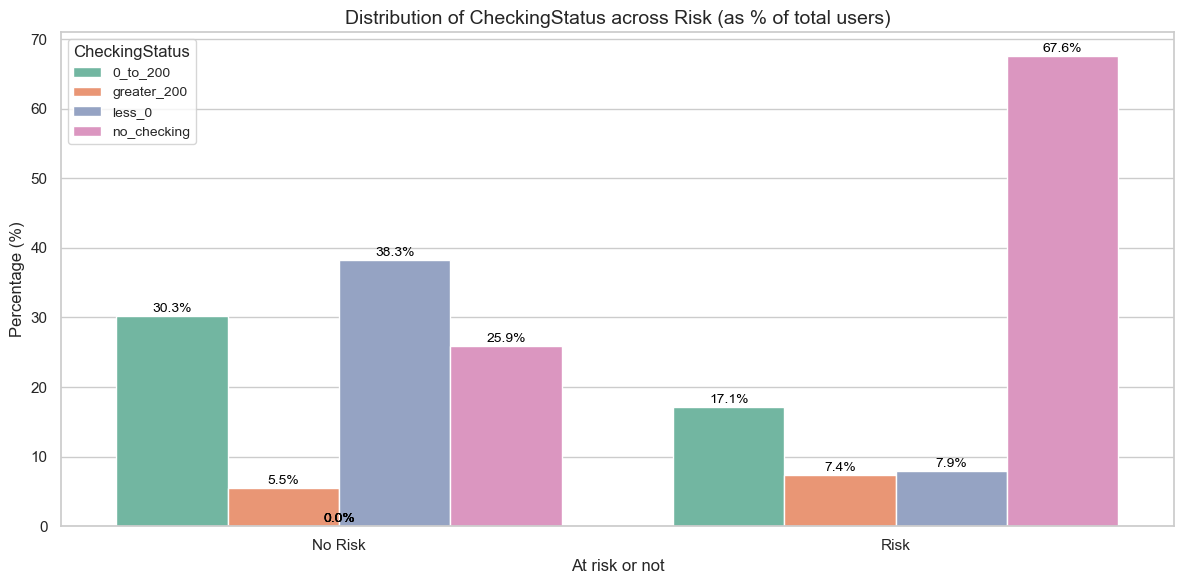

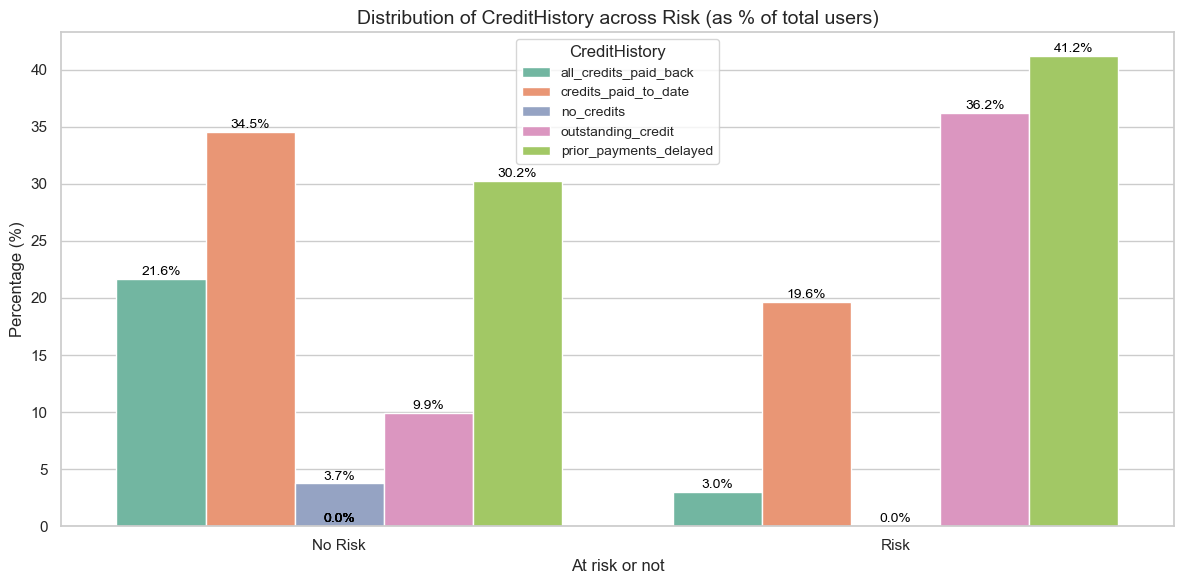

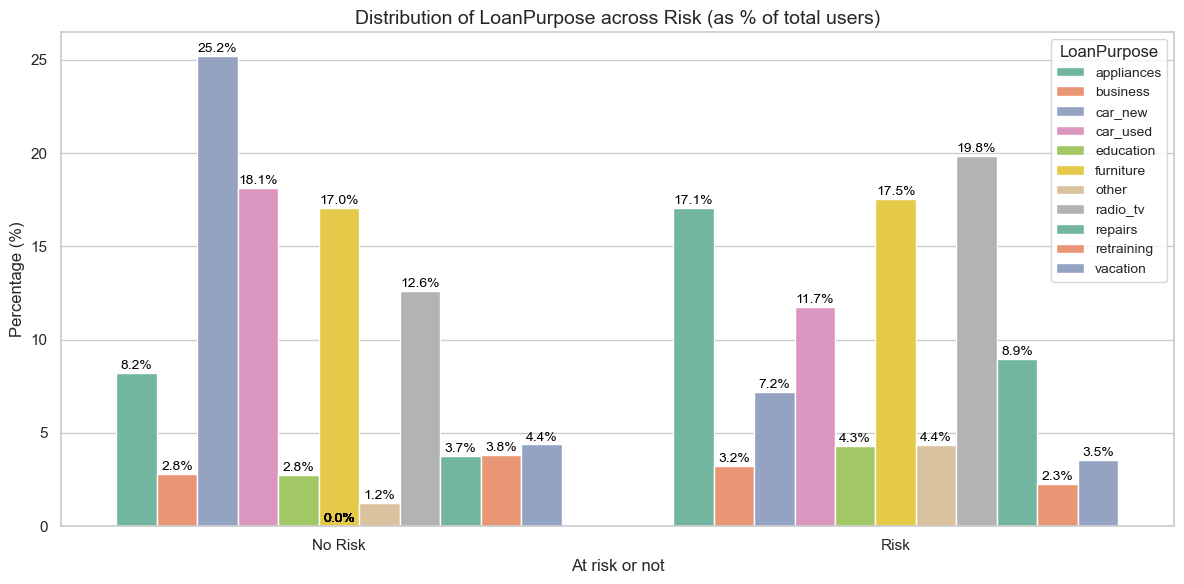

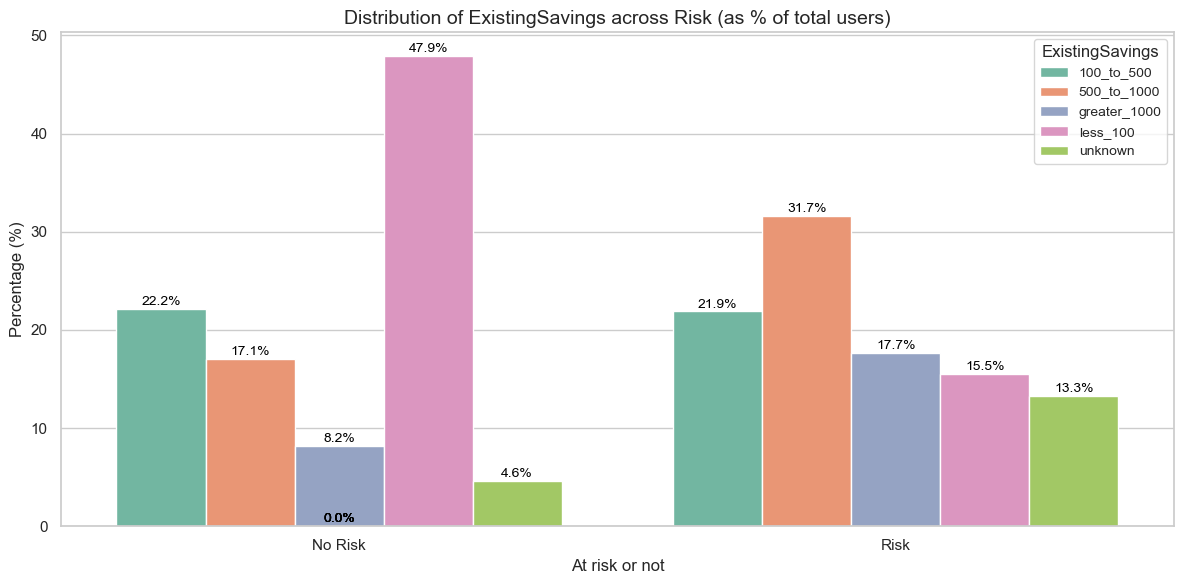

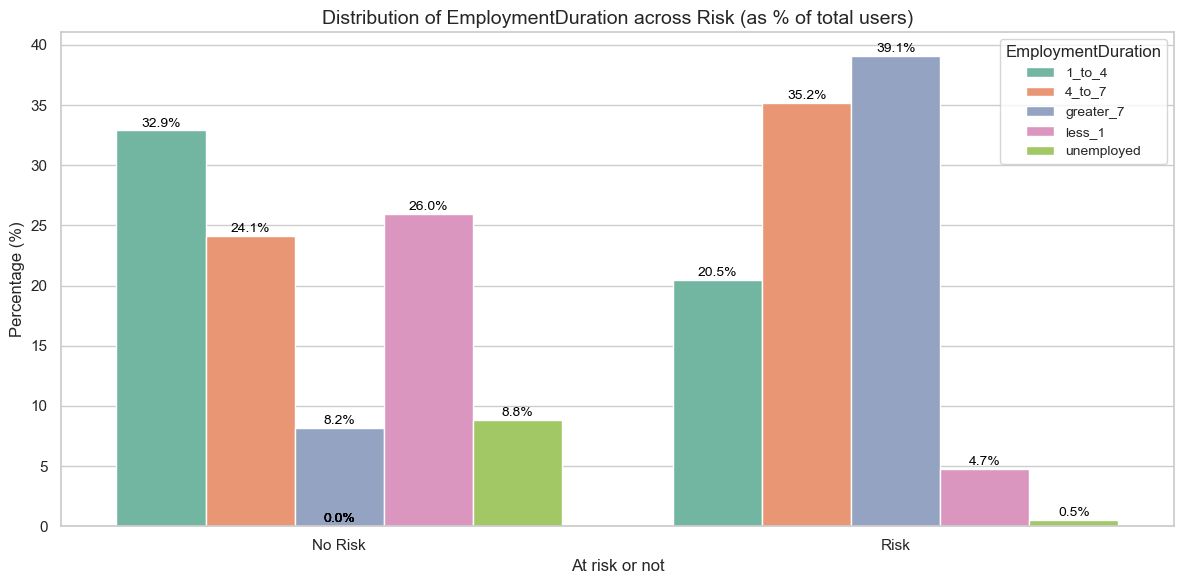

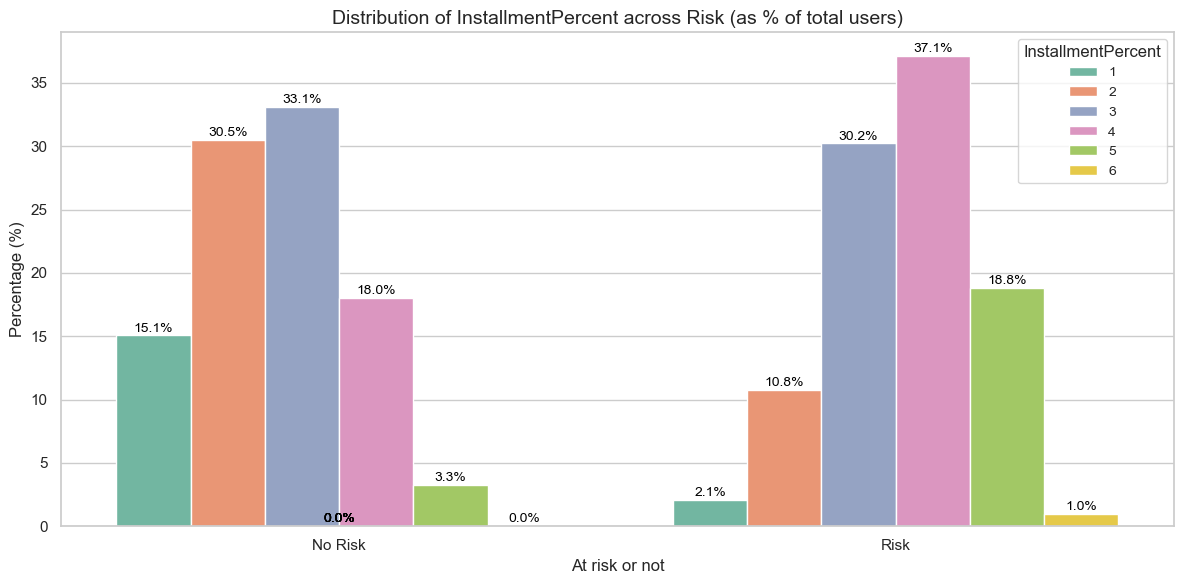

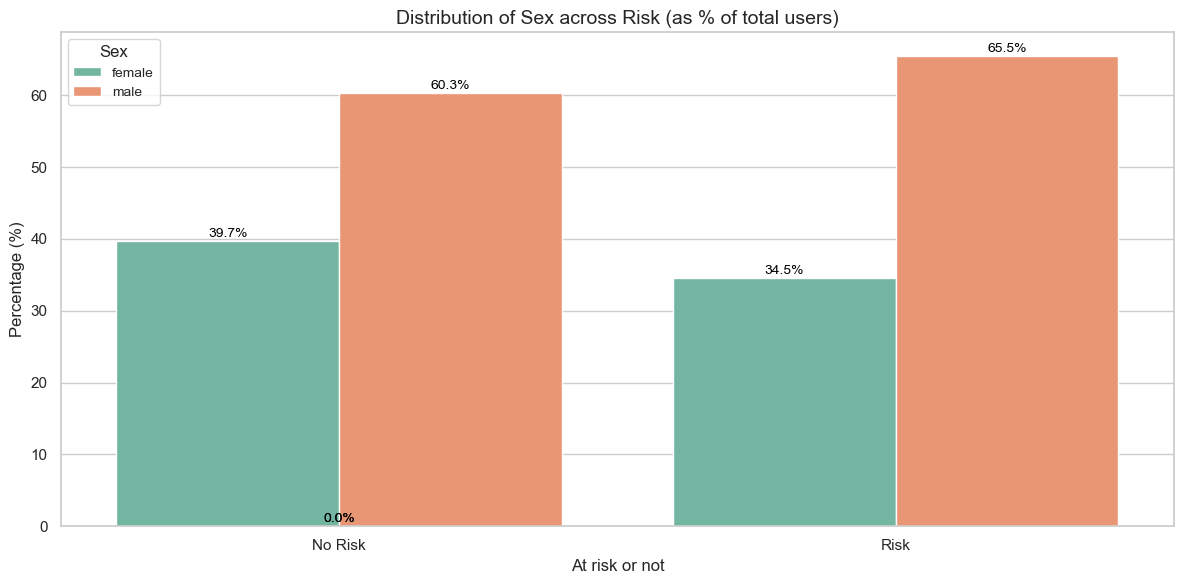

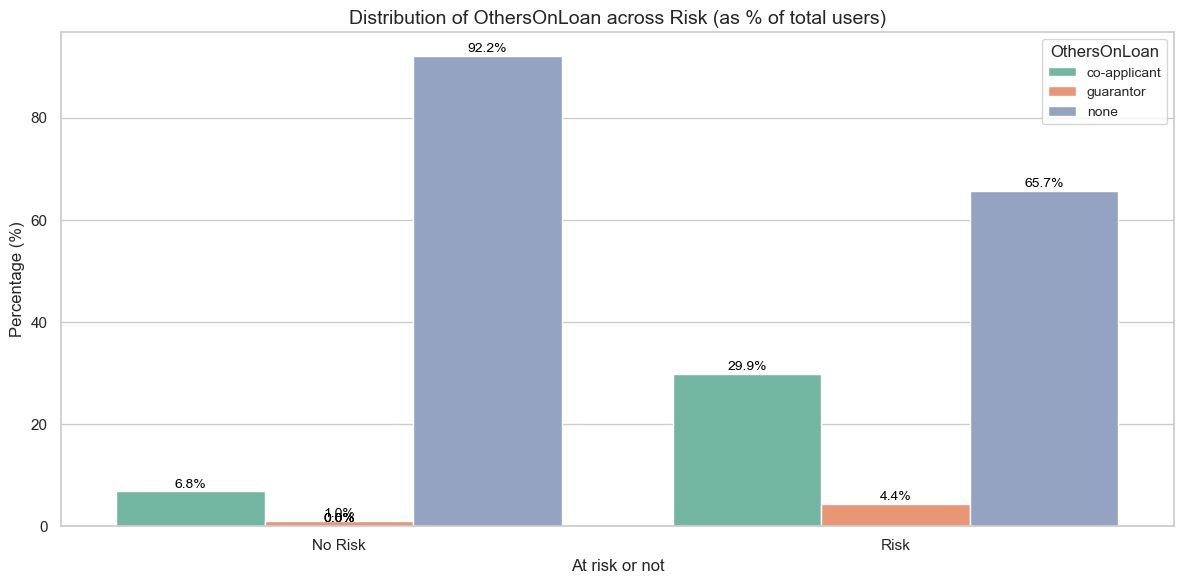

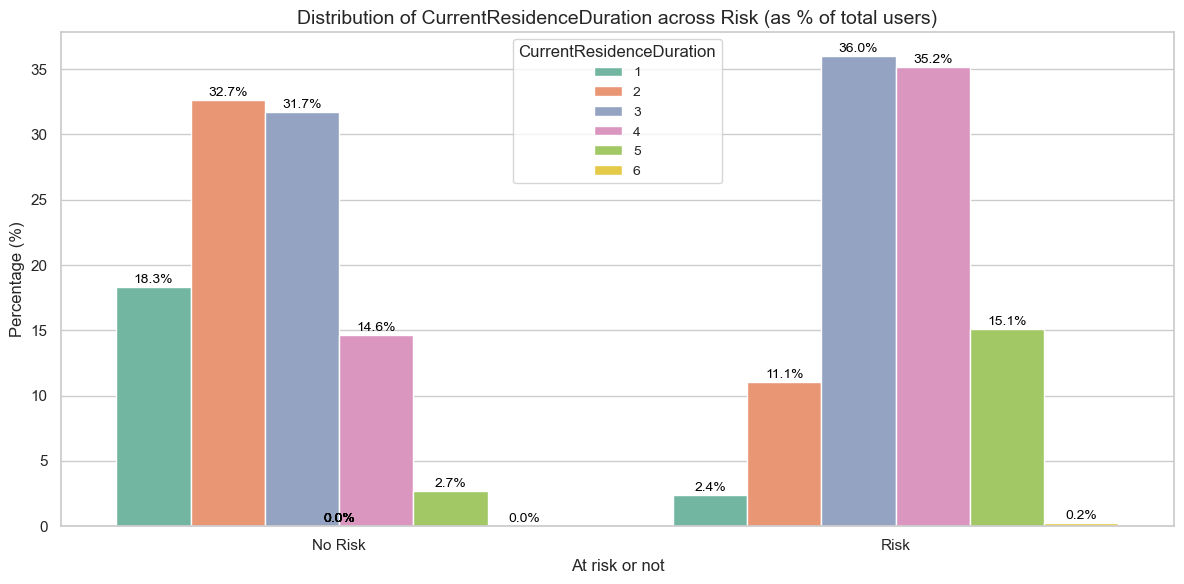

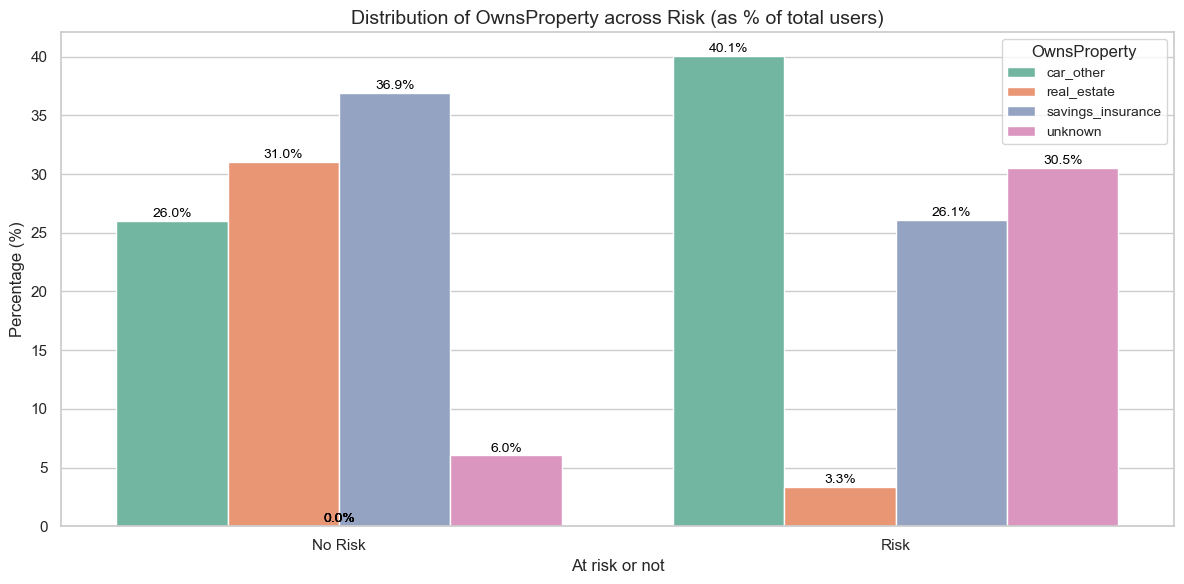

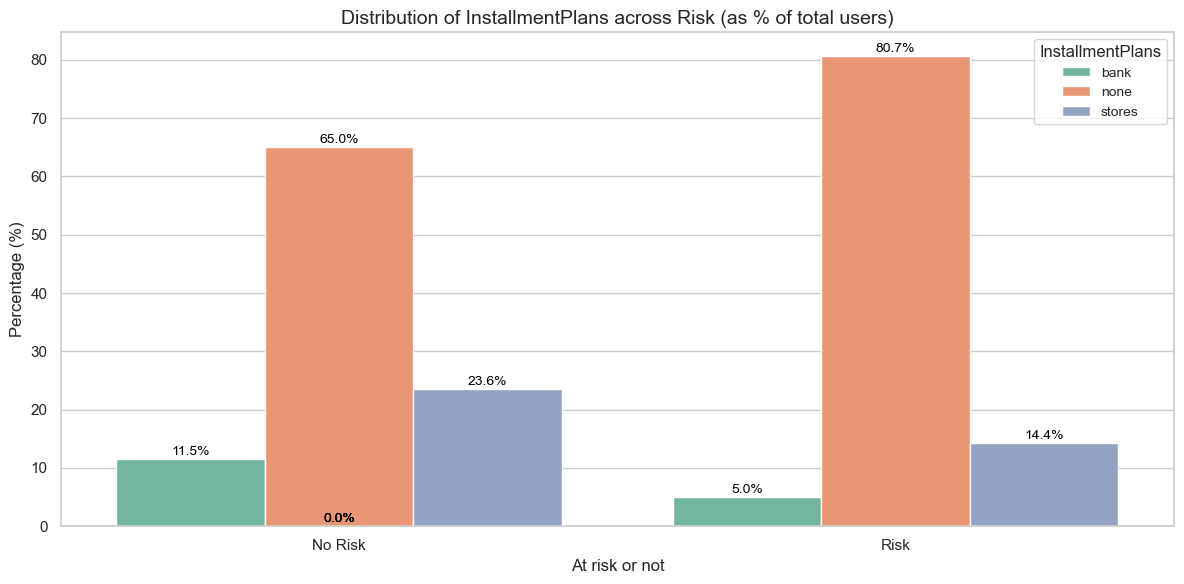

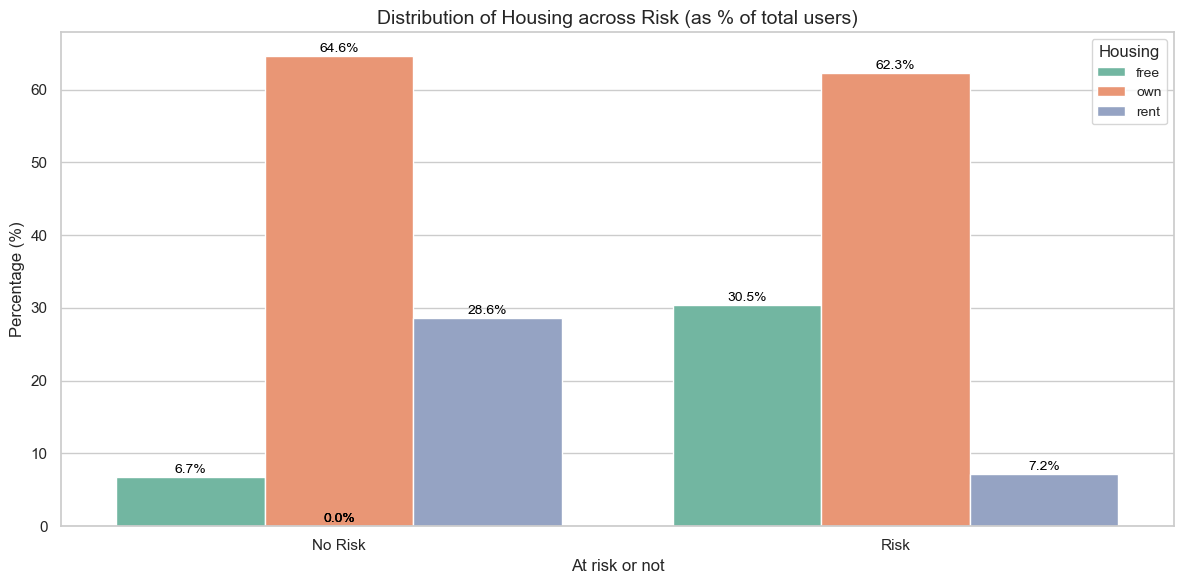

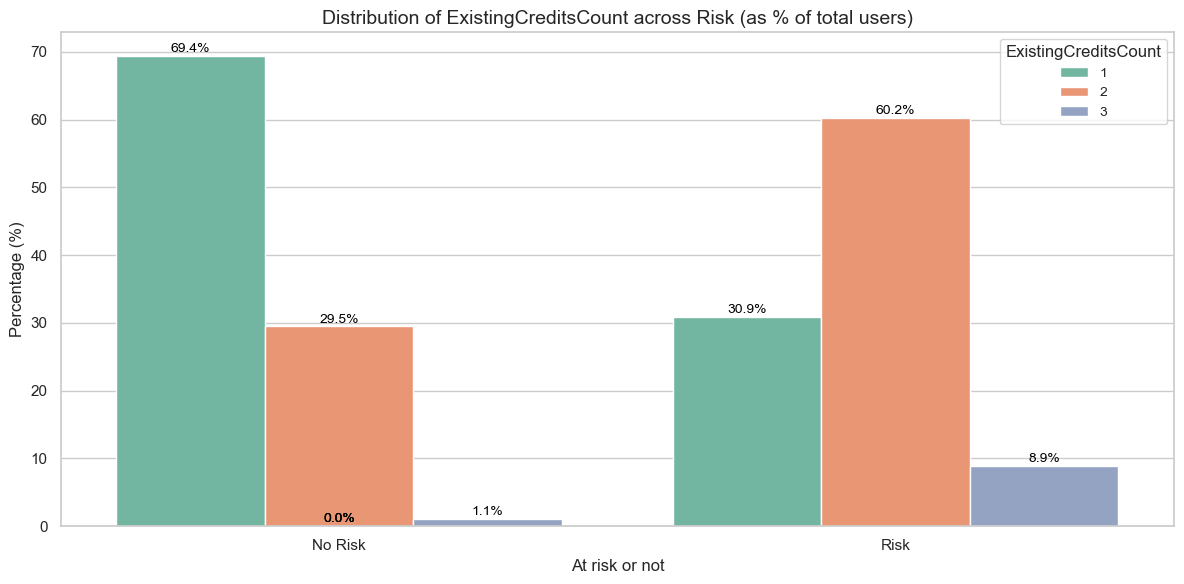

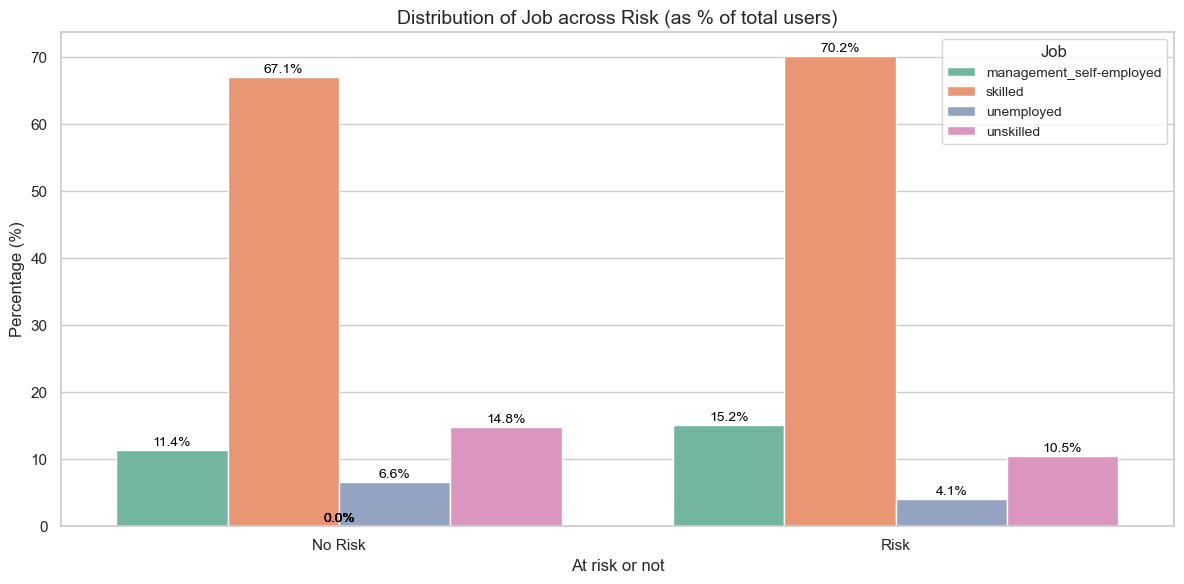

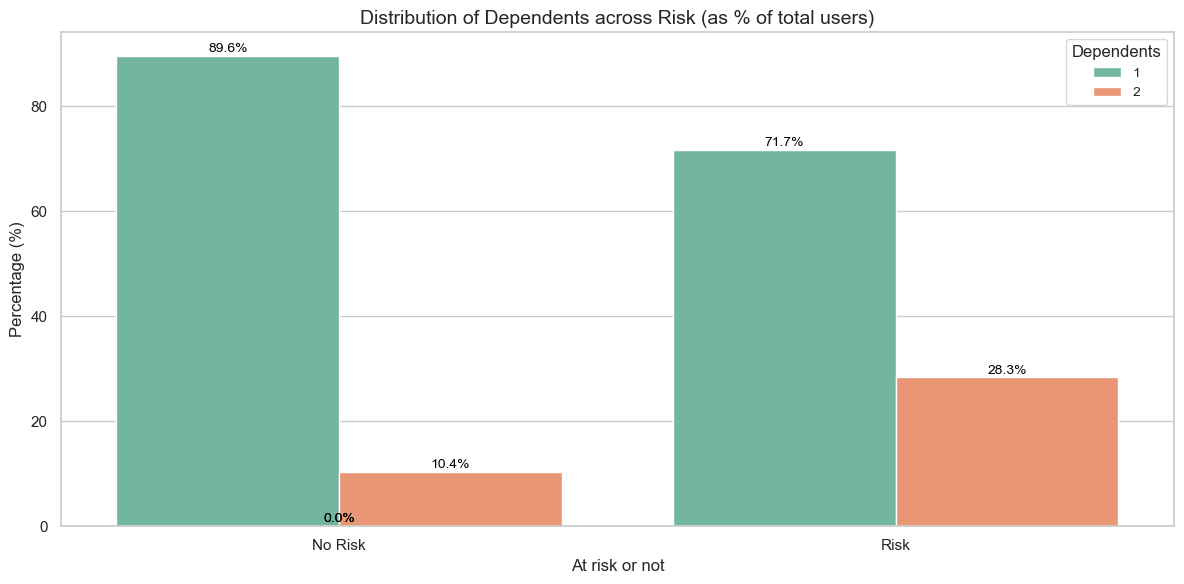

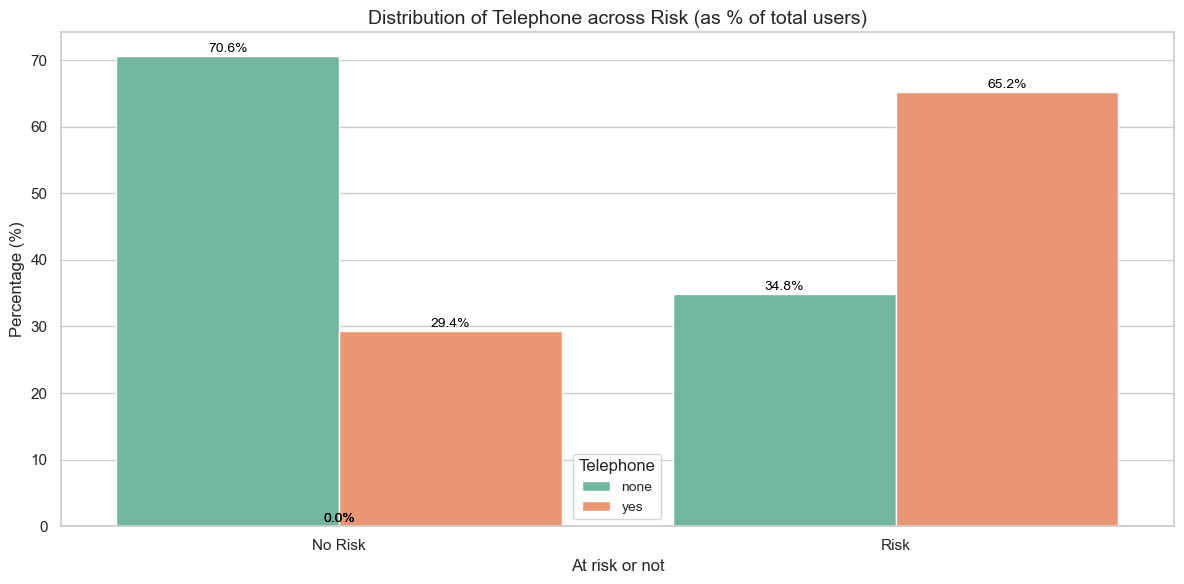

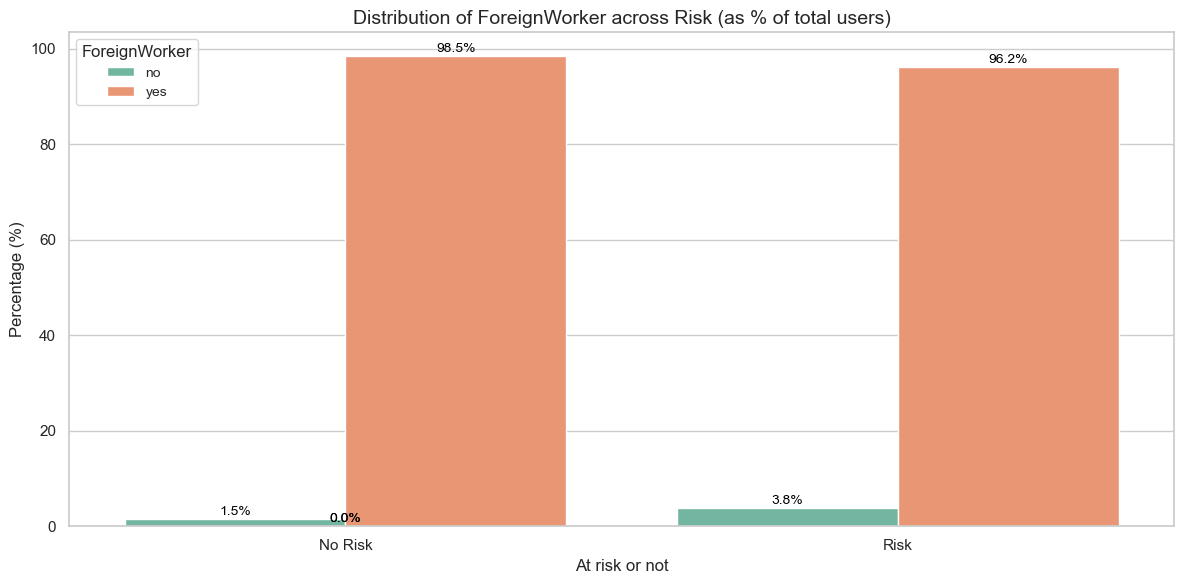

In [29]:
sns.set_theme(style="whitegrid")

# Here again, we want all features to be considered one by one
columns_to_analyze = x_train.drop(columns= ['Risk', 'Age', 'LoanDuration', 'LoanAmount']).columns

# Creating cross_tabs to enable the plotting of barplots
for col in columns_to_analyze:
    cross_tab = (
        pd.crosstab(x_train[col], x_train["Risk"], normalize="columns")
        * 100
    )  # We calculate the cross tab for each column we want to analyze
    cross_tab = cross_tab.reset_index().melt(
        id_vars=[col], var_name="Risk", value_name="Percentage"
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=cross_tab, x="Risk", y="Percentage", hue=col, palette="Set2"
    )

    # To make it more readable, we added the % as annotations directly above the bars of the barplot
    for p in ax.patches:
        percentage = f"{p.get_height():.1f}%"
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            fontsize=10,
            color="black",
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.title(
        f"Distribution of {col} across Risk (as % of total users)", fontsize=14
    )
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xlabel("At risk or not", fontsize=12)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()

    plt.show()

Finally, before moving on, let's plot the number of people at risk in function of Age/Loan Duration and Loan Amount: 

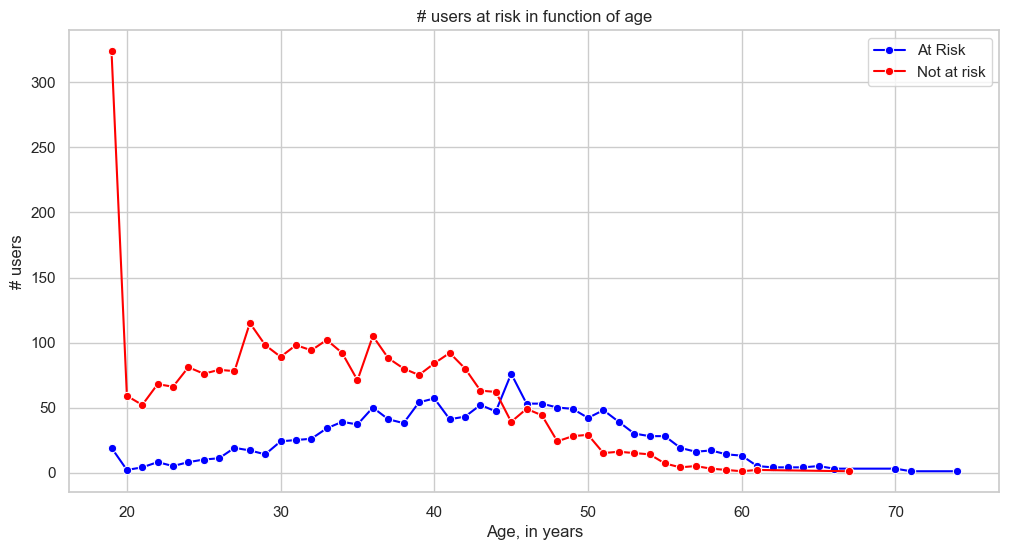

In [33]:
sns.set_theme(style="whitegrid")
mask = (x_train['Risk'] == 'Risk')
at_risk = x_train[mask]
mask = (x_train['Risk'] == 'No Risk')
no_risk = x_train[mask]
age_counts1 = at_risk["Age"].value_counts().sort_index()
age_counts2 = no_risk["Age"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x=age_counts1.index,
    y=age_counts1.values,
    marker="o",
    color="blue",
    label="At Risk",
)
ax = sns.lineplot(
    x=age_counts2.index,
    y=age_counts2.values,
    marker="o",
    color="red",
    label="Not at risk",
)


plt.title("# users at risk in function of age")
plt.xlabel("Age, in years")
plt.ylabel("# users")
plt.show()

We notice that from 45 years old, users are more likely to be at risk. On the contrary, before turning 30, proportion of at risk users represent a clear minority

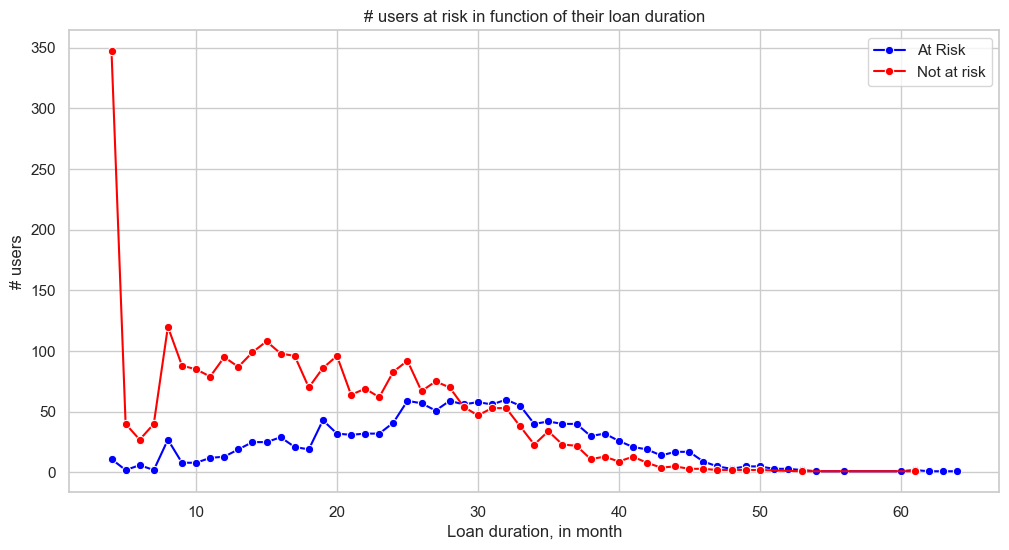

In [36]:
sns.set_theme(style="whitegrid")

duration_1 = at_risk["LoanDuration"].value_counts().sort_index()
duration_2 = no_risk["LoanDuration"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x=duration_1.index,
    y=duration_1.values,
    marker="o",
    color="blue",
    label="At Risk",
)
ax = sns.lineplot(
    x=duration_2.index,
    y=duration_2.values,
    marker="o",
    color="red",
    label="Not at risk",
)


plt.title("# users at risk in function of their loan duration")
plt.xlabel("Loan duration, in month")
plt.ylabel("# users")
plt.show()

Similarily to age, the longer your loan duration, the more chance you have to be at risk, even though here it is hard to have an evident law about it. 